In [105]:
import numpy as np
import matplotlib.pyplot as plt
import math as mh

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import scipy.optimize as opt
from scipy.odr import *
#from astropy import table

font=24
style='normal'

In [109]:
data = np.genfromtxt('/Users/abubakribrahim/Desktop/observations/SGR1935/xmm/0882184001/phase_resolved_spec/BBPL_4001_phase_0-0.5_0.5-1.xcm', skip_header=3)  #eeufs

a = np.argwhere(np.isnan(data[:,0]))
a = a.flatten()

data = np.vsplit(data,a)
#data_1 = data[0]
#data_1b = data[1][1:]
#data_2 = data[2][1:]
#data_2b = data[3][1:]
#data_bb = data[4][1:]
#data_pl = data[5][1:]
#data_Oct2020 = data[6][1:]

#resdata_1 = data[4][1:]
#resdata_1b = data[5][1:]
#resdata_2 = data[6][1:]
#resdata_2b = data[7][1:]
#resdata_Sep2020 = data[11][1:]
#resdata_Sep2020b = data[12][1:]
#resdata_Oct2020 = data[13][1:]

ValueError: Some errors were detected !
    Line #6 (got 4 columns instead of 3)
    Line #7 (got 2 columns instead of 3)
    Line #8 (got 2 columns instead of 3)
    Line #9 (got 4 columns instead of 3)
    Line #11 (got 2 columns instead of 3)
    Line #12 (got 4 columns instead of 3)
    Line #13 (got 6 columns instead of 3)
    Line #14 (got 6 columns instead of 3)
    Line #15 (got 6 columns instead of 3)
    Line #16 (got 6 columns instead of 3)
    Line #17 (got 6 columns instead of 3)
    Line #18 (got 2 columns instead of 3)
    Line #19 (got 6 columns instead of 3)
    Line #20 (got 6 columns instead of 3)
    Line #21 (got 6 columns instead of 3)
    Line #22 (got 6 columns instead of 3)
    Line #23 (got 2 columns instead of 3)

In [107]:
print(data)


[[ 3.37947011e-01  3.40410024e-02  4.96697441e-21 ...  1.04290693e-21
   2.99054342e-22  7.43852617e-22]
 [ 5.14959514e-01  1.42971516e-01  7.26288418e-10 ...  5.94273741e-10
   2.84289425e-10  3.09984316e-10]
 [ 7.76441514e-01  1.18510485e-01  1.13012732e-06 ...  8.53888992e-07
   4.78377331e-07  3.75511661e-07]
 ...
 [ 8.97999954e+00  1.20000362e-01  3.48056883e-01 ...             nan
              nan             nan]
 [ 9.26250076e+00  1.62499905e-01 -8.72206092e-01 ...             nan
              nan             nan]
 [ 9.71249962e+00  2.87499905e-01  9.76083800e-02 ...             nan
              nan             nan]]


/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_45648/173947723.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)
/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_45648/173947723.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)


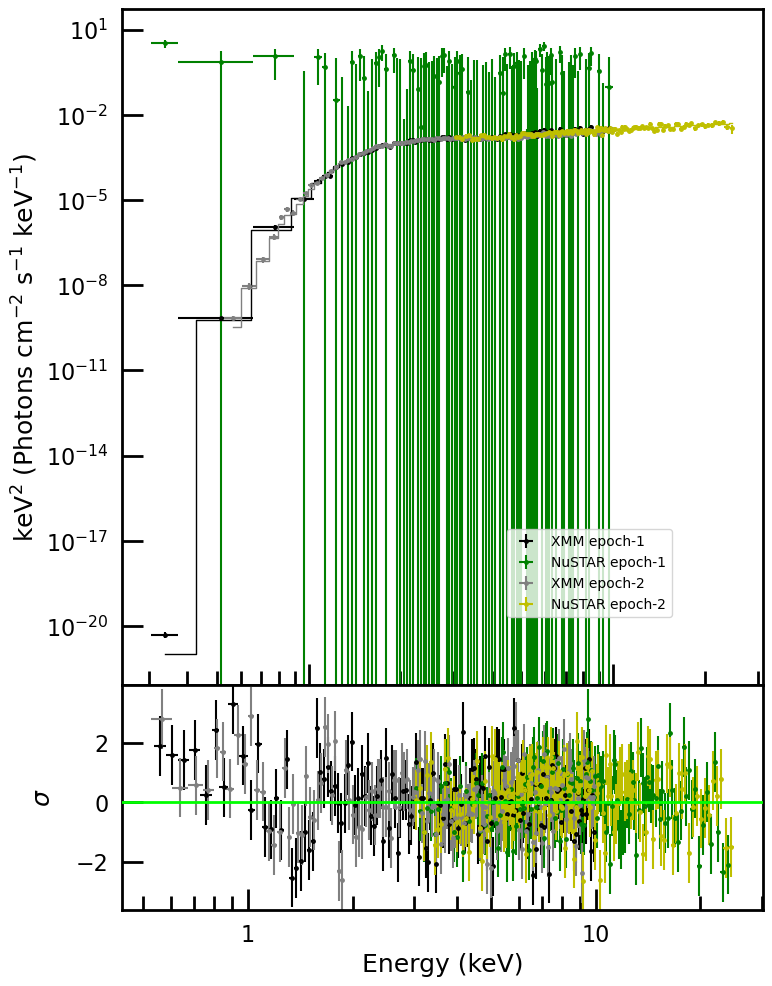

In [108]:
f1 = plt.figure(figsize=(8.27,11.69))  #a4

gs = gridspec.GridSpec(200,200) 
gs.update(wspace=0,hspace=0)# top=1.1)

up =  plt.subplot(gs[:150,:200])
up.errorbar(data_1[:,0], data_1[:,2], xerr=data_1[:,1], yerr=data_1[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='black',label = 'XMM epoch-1')
up.errorbar(data_1[:,0], data_1[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

up.errorbar(data_1b[:,0], data_1b[:,2], xerr=data_1b[:,1], yerr=data_1b[:,3], 
             fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g', label = 'NuSTAR epoch-1')
up.errorbar(data_1b[:,0], data_1b[:,4], color= 'g', lw=1, drawstyle = 'steps-mid') 



up.errorbar(data_2[:,0], data_2[:,2], xerr=data_2[:,1], yerr=data_2[:,3], 
             fmt = '.', fillstyle = 'none', mec='gray', mew = 2, ms=3, color='gray',label = 'XMM epoch-2')
up.errorbar(data_2[:,0], data_2[:,4], color= 'gray', lw=1, drawstyle = 'steps-mid') 

up.errorbar(data_2b[:,0], data_2b[:,2], xerr=data_2b[:,1], yerr=data_2b[:,3], 
             fmt = '.', fillstyle = 'none', mec='y', mew = 2, ms=3, color='y', label = 'NuSTAR epoch-2')
up.errorbar(data_2b[:,0], data_2b[:,4], color= 'y', lw=1, drawstyle = 'steps-mid') 


'''
up.errorbar(data_bb[:,0], data_bb[:,2], xerr=data_bb[:,1], yerr=data_bb[:,3], 
             fmt = '.', fillstyle = 'none', mec='r', mew = 2, ms=3, color='r',label = 'bb')
up.errorbar(data_bb[:,0], data_bb[:,4], color= 'r', lw=1, drawstyle = 'steps-mid') 

up.errorbar(data_pl[:,0], data_pl[:,2], xerr=data_pl[:,1], yerr=data_pl[:,3], 
             fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b', label = 'pl')
up.errorbar(data_pl[:,0], data_pl[:,4], color= 'b', lw=1, drawstyle = 'steps-mid') 



up.errorbar(data_Sep2020[:,0], data_Sep2020[:,2], xerr=data_Sep2020[:,1], yerr=data_Sep2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b',label = '2020 Sep')
up.errorbar(data_Sep2020[:,0], data_Sep2020[:,4], color= 'b', lw=1, drawstyle = 'steps-mid') 

up.errorbar(data_Sep2020b[:,0], data_Sep2020b[:,2], xerr=data_Sep2020b[:,1], yerr=data_Sep2020b[:,3], 
             fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b')
up.errorbar(data_Sep2020b[:,0], data_Sep2020b[:,4], color= 'b', lw=1, drawstyle = 'steps-mid') 



up.errorbar(data_Oct2020[:,0], data_Oct2020[:,2], xerr=data_Oct2020[:,1], yerr=data_Oct2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g',label = '2020 Oct')
up.errorbar(data_Oct2020[:,0], data_Oct2020[:,4], color= 'g', lw=1, drawstyle = 'steps-mid') 
'''
up.set_yscale('log')
up.set_xscale('log')

up.xaxis.set_visible(True)
#up.tick_params(axis='x', which='both',labelbottom='off')
up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)

up.set_ylabel('keV$^2$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=18, fontweight=style)#, labelpad=23)
up.legend(loc=[0.6,0.1], fontsize=10) 

below = plt.subplot(gs[150:200,:200])

below.axhline(y = 0, color = 'lime', lw = 2, zorder=10)

below.errorbar(resdata_1[:,0], resdata_1[:,2], xerr=resdata_1[:,1], 
    yerr=resdata_1[:,3], fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')

below.errorbar(resdata_1b[:,0], resdata_1b[:,2], xerr=resdata_1b[:,1], 
    yerr=resdata_1b[:,3], fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g')



below.errorbar(resdata_2[:,0], resdata_2[:,2], xerr=resdata_2[:,1], 
    yerr=resdata_2[:,3], fmt = '.', fillstyle = 'none', mec='gray', mew = 2, ms=3, color='gray')

below.errorbar(resdata_2b[:,0], resdata_2b[:,2], xerr=resdata_2b[:,1], 
    yerr=resdata_2b[:,3], fmt = '.', fillstyle = 'none', mec='y', mew = 2, ms=3, color='y')

'''

below.errorbar(resdata_Sep2020[:,0], resdata_Sep2020[:,2], xerr=resdata_Sep2020[:,1], 
    yerr=resdata_Sep2020[:,3], fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b')

below.errorbar(resdata_Sep2020b[:,0], resdata_Sep2020b[:,2], xerr=resdata_Sep2020b[:,1], 
    yerr=resdata_Sep2020b[:,3], fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b')



below.errorbar(resdata_Oct2020[:,0], resdata_Oct2020[:,2], xerr=resdata_Oct2020[:,1], 
    yerr=resdata_Oct2020[:,3], fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g')

'''

below.set_xscale('log')
below.set_ylim([-3.6,3.95])

below.set_ylabel( '$\sigma$', fontsize = 18, fontweight=style, labelpad=15)
below.set_xlabel('Energy (keV)', fontsize = 18, fontweight=style)


below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)

for axis in [up,below]:
	axis.tick_params(which='major', width=2,length=15,labelsize=16,pad=10,direction='in')
	axis.tick_params(which='minor', width=2,length=10,labelsize=16,pad=10,direction='in')
	
	for ax in ['top','bottom','left','right']:
    		axis.spines[ax].set_linewidth(2)

plt.savefig('persistent_spectra_SGRJ1935.pdf', bbox_inches = 'tight')
plt.show()
